# Bike Sharing Data Presentation
## by Anna-Anastasiia Balatska

## Investigation Overview

The goal of the presentation is to find out:
- when are most trips taken
- who are the main users 
- how different is the behaviour of different user types

## Dataset Overview

[Bay Wheels](https://www.lyft.com/bikes/bay-wheels) is a regional public bicycle sharing system in California's San Francisco Bay Area. [Bay Wheels's trip data set](https://s3.amazonaws.com/baywheels-data/index.html) includes information about individual rides made in the bike-sharing system. I downloaded 20 zip files about rides made since January 2019 until August 2020, opened them in 1 pandas dataframe and then performed data cleaning.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import zipfile, os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the cleaned dataset into a pandas dataframe
clean_df = pd.read_csv('baywheel.csv', low_memory=False)

## User Types

BayWheels has 2 types of users: subscribers and usual customers. Almost 70% of users of the bike sharing system are subscribers.

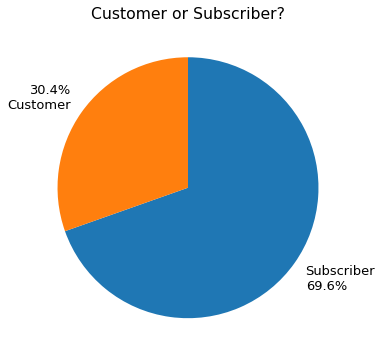

In [3]:
# pie chart for user types
plt.figure(figsize=[6,6])
sorted_user_type = clean_df['user_type'].value_counts()
plt.rcParams['font.size'] = 13
plt.pie(sorted_user_type, labels=sorted_user_type.index, startangle=90, counterclock=False, autopct='%1.1f%%', 
        pctdistance=1.3);
plt.title('Customer or Subscriber?');

## Ride Count Monthly

Interestingly, popularity of BayWheels spiked in January and February 2020 compared to previous year. It looks like they had great potential for this year but due to the global COVID-19 pandemy they had almost 60% fall in March and it fell down even more in April (twice less bike rides compared to March).

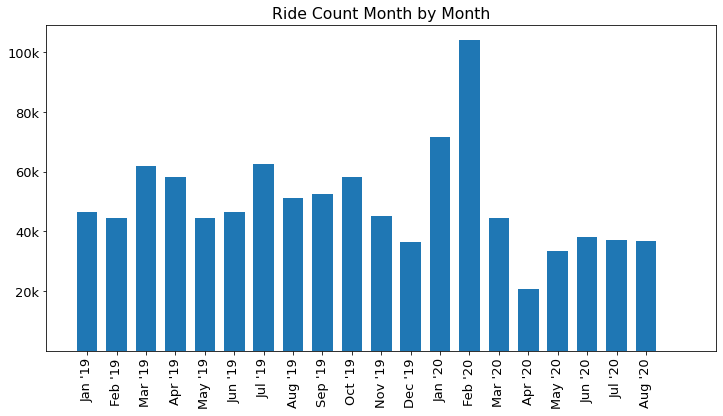

In [4]:
# create month-year list
month_year = pd.to_datetime(clean_df['started_at']).dt.strftime('%b \'%y')

# chart for monthly count
plt.figure(figsize=[12,6])
bins = np.arange(-0.5, 20.5+1, 1)
plt.hist(month_year, bins=bins, rwidth=0.7);
plt.xticks(np.arange(0, 19+1, 1), rotation=90);
ticks = plt.xticks()
plt.yticks([20000,40000,60000,80000,100000],['20k','40k','60k','80k','100k']);
plt.title('Ride Count Month by Month');

## Average Duration of Rides for Different User Types

The average duration of rides depends on user type, time of a day and if it is a weekend or a weekday. Customers use service for longer periods of time compared to subcribers. And all users prefer longer trips on weekends, at night and during day (from 11 am until 3 pm). It's interesting that the ride duration is significantly lower during rush hours when people use bikes specifically to get to work from home or train station in the morning and to go back in the evening.

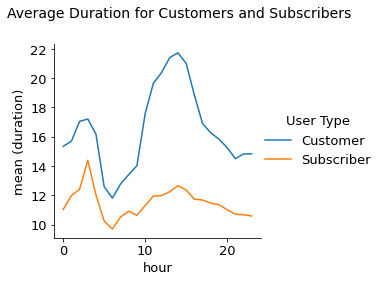

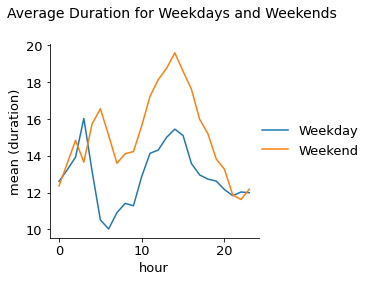

In [10]:
# function for line plot
def mean_poly(x, y, bins = 10, **kwargs):
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

# create line plot to see distribution over time for user types
bin_edges = np.arange(-0.5, clean_df['duration_min'].max()+1, 1)
g = sns.FacetGrid(data = clean_df, hue = 'user_type', height = 4);
g.map(mean_poly, "hour", "duration_min", bins = bin_edges);
g.set_ylabels('mean (duration)');
g.add_legend();
g.fig.suptitle('Average Duration for Customers and Subscribers', size=14)
g.fig.subplots_adjust(top=.85)
g._legend.set_title('User Type')

# create line plot to see distribution over time for different days of week
clean_df.loc[clean_df['day_of_week'] < 6, 'weekends'] = 'Weekday'
clean_df.loc[clean_df['day_of_week'] > 5, 'weekends'] = 'Weekend'
bin_edges = np.arange(-0.5, clean_df['duration_min'].max()+1, 1)
g = sns.FacetGrid(data = clean_df, hue = 'weekends', height = 4);
g.map(mean_poly, "hour", "duration_min", bins = bin_edges);
g.set_ylabels('mean (duration)');
g.add_legend();
g.fig.suptitle('Average Duration for Weekdays and Weekends', size=14)
g.fig.subplots_adjust(top=.85)
g._legend.set_title('')